#### 檔案存取open內建函式的使用
- 在讀取或寫入文件之前，必須使用 Python 內建的 open( ) 函數開啟 文件
- 這個函數將建立一個文件物件，這個文件物件會與真實的文件做連結，可讓您透過文件物件對文件進行存取動作。

```file object = open(file_name [, access_mode])```

- UTF8 編碼資料還請加入另一個參數才可避免亂碼:encoding=‘utf-8'
- file_name：參數是一個字串資料，代表包含要連結的文件名稱。
- access_mode：確定文件必須打開的模式，包括讀取、寫 入、附加等等。稍後會列完整列表。這是可選參數，默認文件訪問模式為 讀取(r)
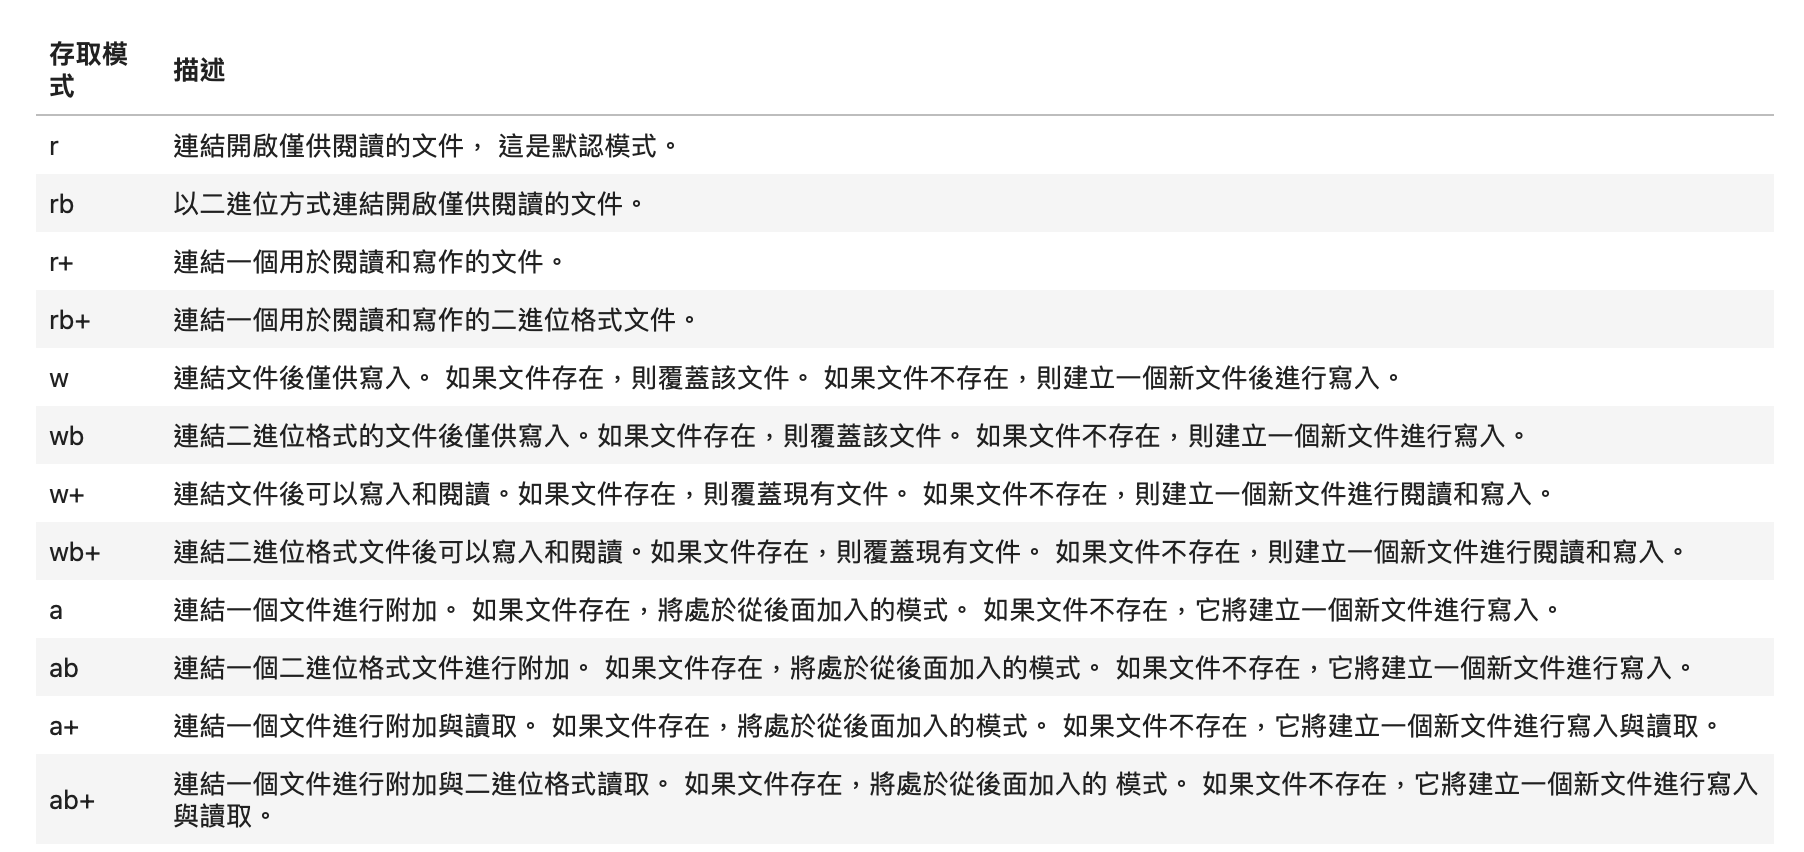

[rows套件用法](https://www.readfog.com/a/1678751239749341184)

In [7]:
# 操作範例1:建立一個text的文件物件，並且寫入資料
# 使用print()＋open()寫入

text = '''python與中文
1. 我們來試試看中文儲存能力。
2. 許這個字會有編碼衝突風險。
3. 犇這個字必須是utf8編碼才有。'''

print(text ,file=open('data.txt','w',encoding='utf-8'))

# print(text ,file=open('data.txt','w'))
# open(資料名稱,'w')－> w 代表文件連結後僅供寫入，且覆蓋該文件原本的內容，如果沒有的話就建立一個data.txt的檔案
# encoding -> 設定打開文件時的編碼格式，如果沒有設定的話預設值＝None，不同平台的預設值都不同，所以設定utf-8萬國碼才可以讀取所有文字（像windows的預設編碼就是GBK編碼>cp936）

In [11]:
# 操作範例2:透過write寫入資料
# 透過內建方法file.write寫入一個字典，並透過創立一個叫score.txt的文件儲存資料

no = 1
scores = dict()

while (True):
    score = int(input(f'請輸入第{no}位的成績:(-1為結束)')) #手動輸入每一個序列的資料
    if score == -1:
        break
    scores[no] = score #把手動輸入的每一筆資料透過編號儲存到字典
    no += 1

file=open('score.txt' , 'w', encoding='utf-8') # 開啟一個score.txt的文件並提供寫入
file.write(str(scores)) #透過 write的method把scores的資料（dict())寫入txt檔案中
file.close() # 關閉一個已打開的文件。關閉後的文件不能再進行讀寫

#### 檔案讀取 READ函式運用

```read([size]) -> method```

- read([size]) 方法從文件當前位置起讀取 size 個字元數量，若無參數，則代表讀取至文件結束為止
- 中文、英數與換行都是一格

[補充](https://blog.csdn.net/quiet_girl/article/details/80113591)

In [8]:
# read讀取整份文件 or read(5) 讀取部分字元數

file = open('data.txt', 'r', encoding='UTF-8') #讀取剛剛建立的data.txt檔案
content = file.read() #透過read方法把僅可閱讀的資料儲存在content實體，沒有寫參數就是讀取整份文件
print(content) 
#file.close( )
print("-------------")

#再新增一個實體contect2，但只閱讀前五個字元數的資料
file = open('data.txt', 'r', encoding='UTF-8') 
content2 = file.read(5) 
print(content2)
file.close( )

python與中文
1. 我們來試試看中文儲存能力。
2. 許這個字會有編碼衝突風險。
3. 犇這個字必須是utf8編碼才有。

-------------
pytho


#### readline 跟 readlines 的使用
- readline 方法
    1. 這個方法每次讀出一行內容，所以讀取時占用緩衝區較小，比較適合大型文件讀取，讀取到沒有資料為止
    2. 若不使用 readline 可用 with 敘述一行一行讀取資料，再使用 for 迴圈 逐一進行處理
    3. len( ) 代表計算字串字數
    
- readlines 方法
    1. 這方法將讀取整個文件所有行，保存在一個 list 內

#### 讀取文件後可搭配使用的方法
``` 
    1. strip() 去除字串首尾的空白
    2. lstrip( ) 去除字串左邊的空白
    3. rstrip( ) 去除字串右邊的空白
    4. startswith(‘字元’): 第一個字元```

In [27]:
f=open('data.txt', 'r', encoding='UTF-8') #建立一個data1.txt僅可讀取的檔案
result = list( ) #建立一個result實體，並以list的形式儲存，未來儲存讀取後的結果用
for line in f.readlines( ): #for in迴圈，讀取f資料裡的每一行
    line = line.strip( )    #去除資料裡的首尾空白
    if not len(line) or line.startswith('#'): #如果資料內的字串首字不是#註解形式
        continue  #繼續讀取下一行
    result.append(line) #透過.append()方法將line的資料寫入result的最後一行
f.close() #讀取到資料最後時，自動關閉檔案的讀取寫入權限
result.sort( ) #將內容自動由小排到大
print(result)  

#建立一個新的檔案，並寫入result的資料，並透過.join函式整理內容(把內容連成一串字串)
#並在字串內部加入 %s 「可替換字串符」 % 替換為 \n 「空一行」（所以內容會自動排列好）
open('result-readlines.txt', 'w', encoding='UTF-8').write('%s' % '\n'.join(result))

#'%s' % '\n'.join(result)
#將result的內容寫入，並將空格結尾變成空一行
#但最後為什麼會有63算字數？

['1. 我們來試試看中文儲存能力。', '2. 許這個字會有編碼衝突風險。', '3. 犇這個字必須是utf8編碼才有。', 'python與中文']


63

#### str字串整理方式(split, join)
```<sep>.join(<iterable>)```

- 讓寫入的內容自動連結成一串字串
- 「iterable」是任何包含子字符串的 Python 可迭代对象，例如一个列表或一个元组
- 「sep」 是你想要它加入子字符串的分隔符，必須以str字串形式呈現
    - %s 可以替换字符串
    - %f 可以替换小数
    - %d 可以替换整数
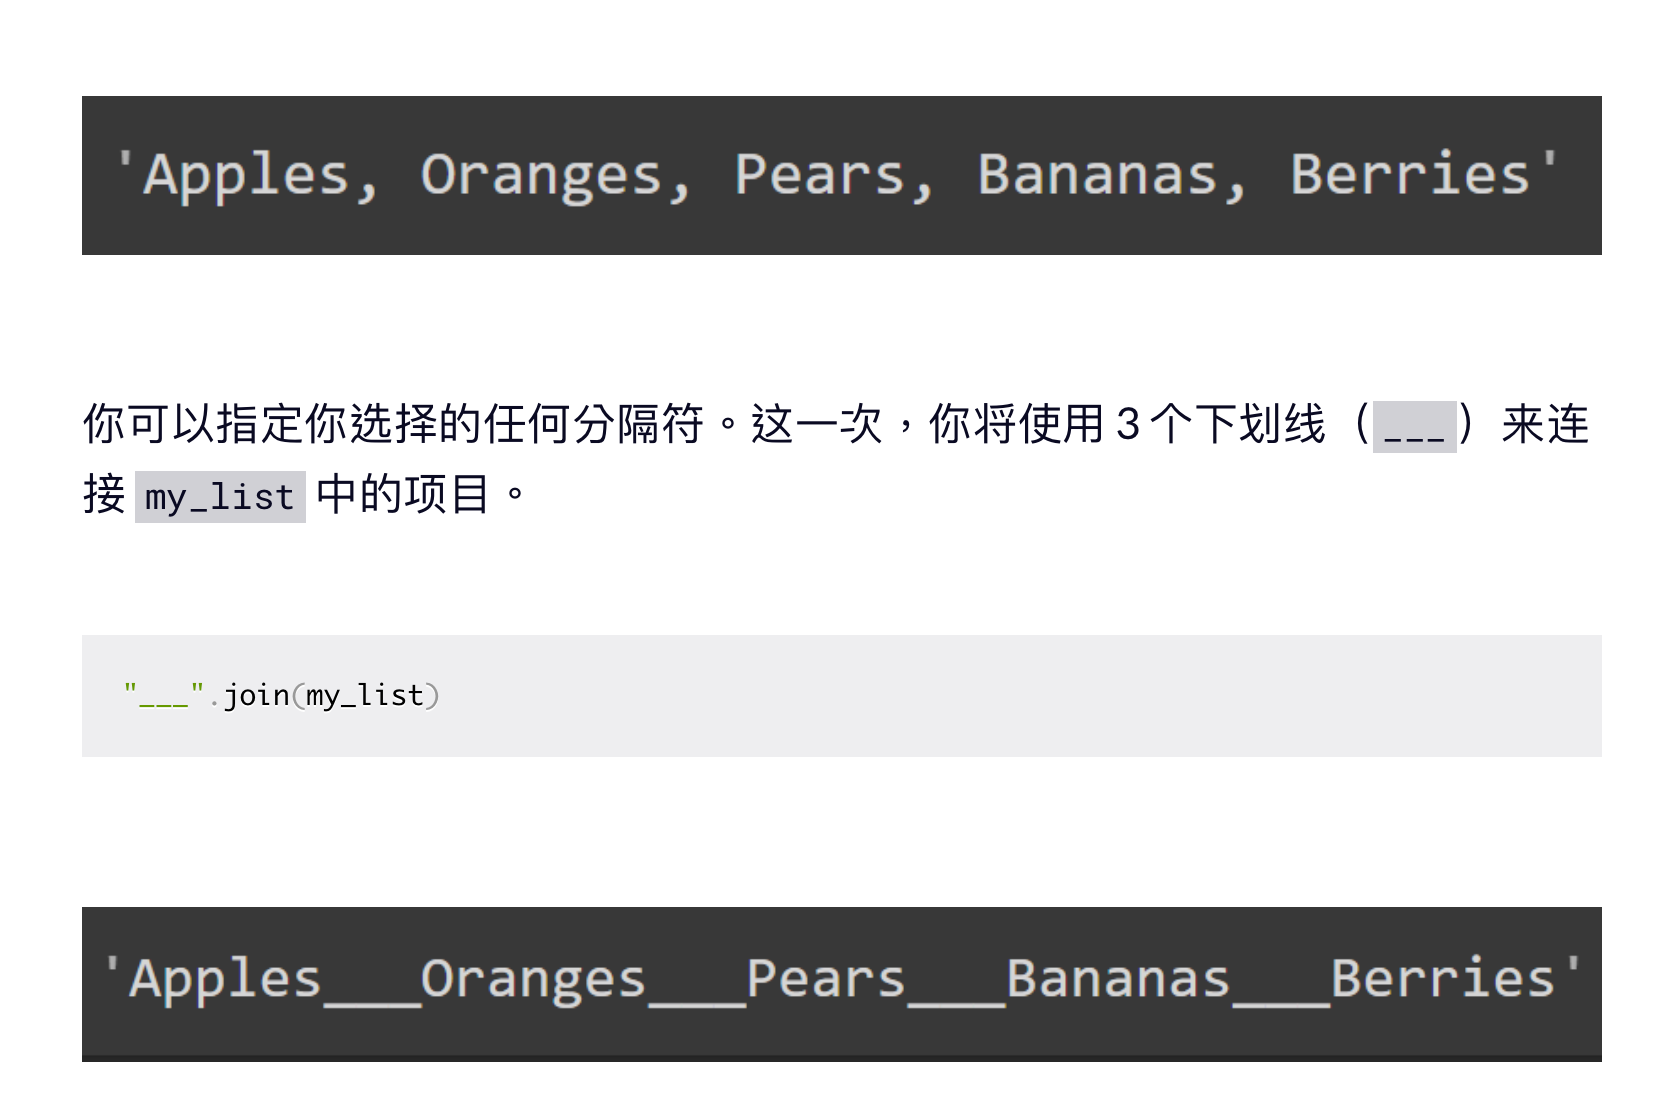

```<string>.split(sep,maxsplit)```

- 「string」 是任何的有效的 Python 字符串
- 「sep」 是你用来作为拆分基准的分隔符，應該以str字串形式呈現
- 如果你想在出现逗号时拆分你可以设置 sep = ","（如果沒設定預設為空格）
- 「maxsplit」 是一个可选参数，指示你要拆分字串的次数（預設值為-1）
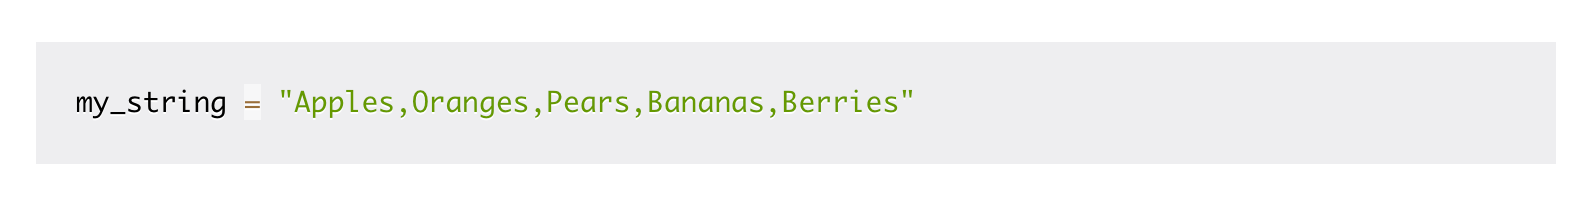
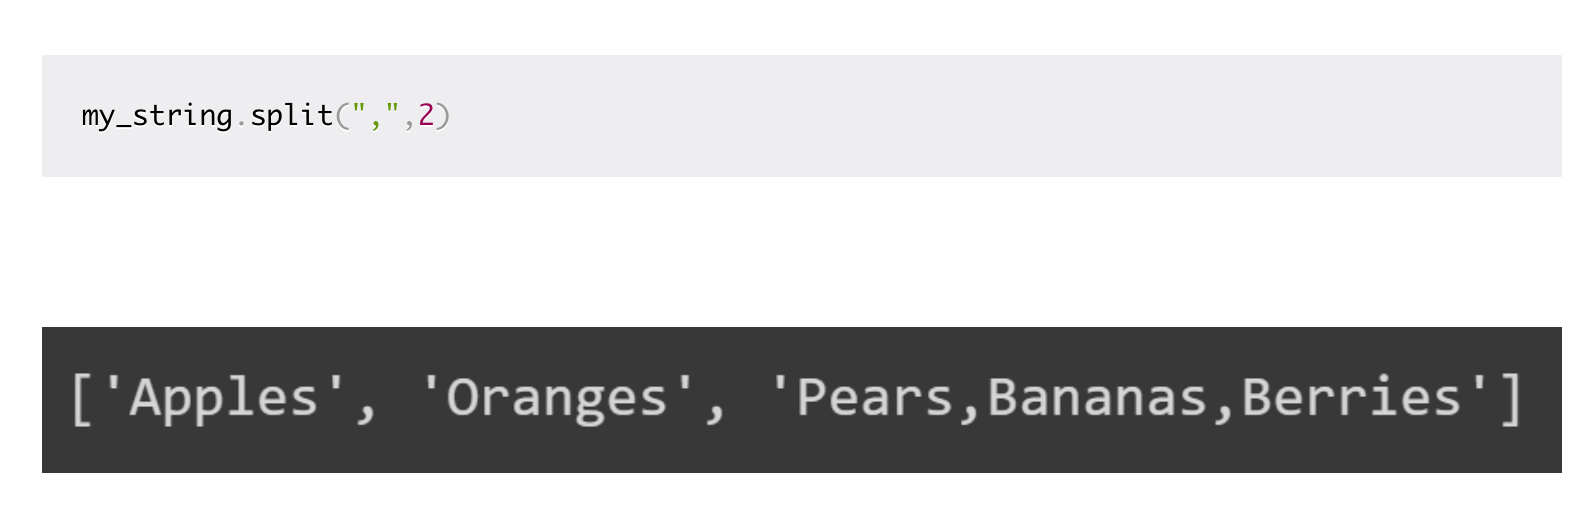

[補充資料](https://www.freecodecamp.org/chinese/news/python-string-split-and-join-methods-explained-with-examples-2/)

#### 讀取CSV檔案

- 逗點分隔（Comma-Separated Values，簡稱 csv）是一種簡單的文字檔格式，以逗號分隔不同欄位的資料，很多軟體在儲存與交換表格資料時都支援這樣的格式

- CSV 格式是資料庫最常用的導入和導出格式
- 資料均沒有類型，一切都是字串
- 沒有字體或顏色與儲存格寬度高度的設置
- Python 語法必須加入 import csv
- 讀取儲存格資料:
    1. reader( ):依照每一列的編號 由0開始
        - 預設excel就是表格
        - **fmtparams：不限數量的引述呼叫
    2. DictReader( )
        - 以第一列的值為每一行的名稱，第一列不是資料
        - 也可以重新命名，但第一列必須是資料

[補充](https://steam.oxxostudio.tw/category/python/library/csv.html)


In [61]:
# 先用requests下載老師github上的ex1.csv檔案
import requests
url = "https://raw.githubusercontent.com/roberthsu2003/python/master/檔案存取/ex1.csv"
res = requests.get(url)
if res.ok:
    print('下載成功')
else:
    print('下載失敗')

#記得下載完成之後要建立檔案並把資料寫入

#用print的寫入方法
'''print(res.text, file=open('ex1.csv', 'w'))'''

#用write的寫入方法
file = open('ex1.csv', 'w')
file.write(str(res.text))
file.close()

下載成功


In [43]:
# 操作範例 1:請動手操作，並留意輸出結果

# 我們使用 csv.reader 讀取出來的 rows 會是一個二維的 list
# 裡面就是整張表格的資料，這裡我們把每一列的 list 直接輸出，執行後會像這樣：
# 一定要用import csv讀取
# 內容可以用list的方式儲存及叫出

import csv 
f=open('ex1.csv',"r",encoding='utf-8') #讀取ex1這個檔案透過f(obj)接收資料內容
rows = csv.reader(f) #rows是一個generator #將資料存入變數rows裡

list1 = list(rows) #將rows資料用list的形式存到list1
print(list1)       #印出list
f.close()

# rows = 每一行
# generator產生器＝當需要迭代內容非常大的串列時，往往會消耗不少電腦的記憶體，這時如果改用「產生器」的方式，就能產生更好的效能
# 但generator產生器的資料只能產生一次

[['a', 'b', 'c', 'd', 'message'], ['1', '2', '3', '4', 'hello'], ['5', '6', '7', '8', 'world'], ['9', '10', '11', '12', 'foo']]


In [9]:
# 內容也可以用for in的方式叫出

import csv 
f=open('ex1.csv',"r",encoding='utf-8') #讀取ex1這個檔案透過f(obj)接收資料內容
rows = csv.reader(f) #rows是一個generator #將資料存入變數rows裡

print(type(rows)) #查詢rows資料型別，得出<class '_csv.reader'>
for row in rows: #用for in把ex1的資料都放到row裡
    print(row)
file.close
print(file.closed)

<class '_csv.reader'>
['a', 'b', 'c', 'd', 'message']
['1', '2', '3', '4', 'hello']
['5', '6', '7', '8', 'world']
['9', '10', '11', '12', 'foo']
True


In [10]:
#請讀入資料集內的(各鄉鎮市區人口密度.csv)
import requests
import csv

url = 'https://github.com/roberthsu2003/python/blob/master/檔案存取/各鄉鎮市區人口密度.csv'
requests.get(url)
download1 = requests.get(url)
if download1.ok:
    print('下載成功')

else:print('下載失敗')

#print(download1.text, file=open('各鄉鎮市區人口密度.csv', 'w', encoding='utf-8') )
#（但這樣寫入的資料沒有分行？應該要再設定strip()去除空白？跟'%s' % '\n'自動換行？）

file = open('各鄉鎮市區人口密度.csv', 'w', encoding='utf-8')
file.write(str(download1.text))
file.close()
print(file.closed)

下載成功
True


In [16]:
#將資料轉為2維的list=>[[],[],[]]
#以list()形式讀取

import csv
f = open('各鄉鎮市區人口密度.csv','r',encoding='UTF-8') #將可讀資料存入f實體中
rows = csv.reader(f) #存入rows
poplist=list(rows)
print(poplist)
f.close()
print(file.closed)

[['\ufeffstatistic_yyy', 'site_id', 'people_total', 'area', 'population_density'], ['統計年', '區域別', '年底人口數', '土地面積', '人口密度'], ['106', '新北市板橋區', '551480', '23.1373', '23835'], ['106', '新北市三重區', '387484', '16.317', '23747'], ['106', '新北市中和區', '413590', '20.144', '20532'], ['106', '新北市永和區', '222585', '5.7138', '38956'], ['106', '新北市新莊區', '416524', '19.7383', '21102'], ['106', '新北市新店區', '302089', '120.2255', '2513'], ['106', '新北市樹林區', '184149', '33.1288', '5559'], ['106', '新北市鶯歌區', '86593', '21.1248', '4099'], ['106', '新北市三峽區', '114926', '191.4508', '600'], ['106', '新北市淡水區', '169597', '70.6565', '2400'], ['106', '新北市汐止區', '199321', '71.2354', '2798'], ['106', '新北市瑞芳區', '40353', '70.7336', '570'], ['106', '新北市土城區', '238067', '29.5578', '8054'], ['106', '新北市蘆洲區', '201309', '7.4351', '27075'], ['106', '新北市五股區', '84919', '34.8632', '2436'], ['106', '新北市泰山區', '78911', '19.1603', '4118'], ['106', '新北市林口區', '106101', '54.1519', '1959'], ['106', '新北市深坑區', '23660', '20.5787', '1150'], ['106', '新北市石碇區

In [15]:
#將資料轉為2維的list=>[{},{},{}]
#以for in迴圈讀取

import csv
f = open('各鄉鎮市區人口密度.csv','r',encoding='UTF-8') #將可讀資料存入f實體中
rows = csv.reader(f)

for poplist in rows:
    print(poplist)


file.close()
print(file.closed)

['\ufeffstatistic_yyy', 'site_id', 'people_total', 'area', 'population_density']
['統計年', '區域別', '年底人口數', '土地面積', '人口密度']
['106', '新北市板橋區', '551480', '23.1373', '23835']
['106', '新北市三重區', '387484', '16.317', '23747']
['106', '新北市中和區', '413590', '20.144', '20532']
['106', '新北市永和區', '222585', '5.7138', '38956']
['106', '新北市新莊區', '416524', '19.7383', '21102']
['106', '新北市新店區', '302089', '120.2255', '2513']
['106', '新北市樹林區', '184149', '33.1288', '5559']
['106', '新北市鶯歌區', '86593', '21.1248', '4099']
['106', '新北市三峽區', '114926', '191.4508', '600']
['106', '新北市淡水區', '169597', '70.6565', '2400']
['106', '新北市汐止區', '199321', '71.2354', '2798']
['106', '新北市瑞芳區', '40353', '70.7336', '570']
['106', '新北市土城區', '238067', '29.5578', '8054']
['106', '新北市蘆洲區', '201309', '7.4351', '27075']
['106', '新北市五股區', '84919', '34.8632', '2436']
['106', '新北市泰山區', '78911', '19.1603', '4118']
['106', '新北市林口區', '106101', '54.1519', '1959']
['106', '新北市深坑區', '23660', '20.5787', '1150']
['106', '新北市石碇區', '7683', '144.3498'

In [17]:
#將資料轉為2維的list=>[{},{},{}] 
#用csv.DictReader寫
#建立一個物件，可以將每一列資訊 map （對映） 到 dict 中

import csv
f = open('各鄉鎮市區人口密度.csv','r',encoding='UTF-8') #將可讀資料存入f實體中
rows = csv.DictReader(f)

for poplist in rows:
    print(poplist)

file.close()
print(file.closed)

{'\ufeffstatistic_yyy': '統計年', 'site_id': '區域別', 'people_total': '年底人口數', 'area': '土地面積', 'population_density': '人口密度'}
{'\ufeffstatistic_yyy': '106', 'site_id': '新北市板橋區', 'people_total': '551480', 'area': '23.1373', 'population_density': '23835'}
{'\ufeffstatistic_yyy': '106', 'site_id': '新北市三重區', 'people_total': '387484', 'area': '16.317', 'population_density': '23747'}
{'\ufeffstatistic_yyy': '106', 'site_id': '新北市中和區', 'people_total': '413590', 'area': '20.144', 'population_density': '20532'}
{'\ufeffstatistic_yyy': '106', 'site_id': '新北市永和區', 'people_total': '222585', 'area': '5.7138', 'population_density': '38956'}
{'\ufeffstatistic_yyy': '106', 'site_id': '新北市新莊區', 'people_total': '416524', 'area': '19.7383', 'population_density': '21102'}
{'\ufeffstatistic_yyy': '106', 'site_id': '新北市新店區', 'people_total': '302089', 'area': '120.2255', 'population_density': '2513'}
{'\ufeffstatistic_yyy': '106', 'site_id': '新北市樹林區', 'people_total': '184149', 'area': '33.1288', 'population_densit

In [24]:
#請讀入資料集內的(各鄉鎮市區人口密度.csv)
#將資料轉為2維的list=>[{},{},{}]
#next()->自動讀入資料的下一行
#csv.DictReader ->自動將資料map成Dict
#通常用row来指代行，而用column来指代列

import csv
poplist = list()
f = open('各鄉鎮市區人口密度.csv','r',encoding='UTF-8')
next(f) #自動讀入下一行，因為第一行通常都是項目
reader = csv.DictReader(f)
data=[{'統計年':row['統計年'],'區域別':row['區域別'],'年底人口數':row['年底人口數'],'土地面積':row['土地面積'],'人口密度':row['人口密度']} for row in reader]
for item in data:
    if '新北市' in item['區域別']:
        poplist.append(item)
poplist

file.close()

#### 寫入 CSV 檔案

- 必須加入 import csv
```
writer(csvfile, dialect='excel', **fmtparams)
```
- csvfile = csv檔名
- dialect='excel' = 預設文件風格，'excel'意思為用逗號「,」分隔資料


```
csv.writer(csvfile, delimiter=' ',quotechar='|')
```
- 利用 writer( ) 可寫入資料，寫入時注意
    1. delimiter - 這是代表分隔符號(這裡指的是空格)
    2. quotechar - 這是代表包住字串的符號（等於是每一個turple之間的分隔符號）

-  writerow（）方法 單行資料寫入
-  writerows() 多行寫入

[補充資料](http://c.biancheng.net/python_spider/csv-module.html)

In [95]:
#下載ex2.csv檔案
import requests
url = "https://github.com/roberthsu2003/python/blob/master/檔案存取/ex2.csv"
download2 = requests.get(url)

if download2.ok:
    print("下載成功")
else:
    print("下載失敗")

#print(download2.text, file=open('ex2.csv', 'w' ))
file = open('ex2.csv', 'w', encoding='utf-8')
file.write(str(download2.text))
file.close()

下載成功


In [3]:
# 操作範例:請動手操作，並留意輸出結果
# 利用 writer( ) 可寫入資料
# delimiter - 這是代表分隔符號
# quotechar - 這是代表包住字串的符號
# csv.writer(csvfile, dialect='excel', **fmtparams)

import csv
f=open('ex2.csv',"r",encoding='utf-8')  #把ex2.csv變成可以讀取的資料，存入f
reader = csv.reader(f)                  #用csv.reader用csv檔案的方式讀取f

ofile = open('ttest.csv', "w",encoding='utf-8') #建立一個新的ttest.csv檔案
writer = csv.writer(ofile, delimiter='-')  
#建立一個csv寫入器叫做writer，存入ofile資料（也就是ttest.csv)每一筆資料之間用-分隔

for row in reader:              #將reader的資料用for in迴圈存入row
    writer.writerow(row)        #延續剛剛的寫入器，csvwriter.writerow(row)->單筆資料的寫入，代表row的資料一筆一筆寫如writer，所以才把ex2.csv的資料寫入ttest.csv中
f.close()
ofile.close()

In [28]:
#讀取-歷年國內主要觀光遊憩據點遊客人數月別統計.csv,取出臺北市和臺中市的資料
#list[1:] ->代表list中從第二項開始的所有內容
#if x in list[] ->如果x在這個list裡面


import csv
with open('歷年國內主要觀光遊憩據點遊客人數月別統計.csv',mode='r',encoding='utf-8') as file:
    csv_reader = csv.reader(file)
    results = list(csv_reader)

for item in results:
    print(item)

taipei = []                 #建立一個taipei的空list，後面把資料寫入
taipei.append(results[0])   #將result第0筆資料寫入taipei的最後一行（應該是項目）
for item in results[1:]:    #item數列，從result[2]開始的所有內容
    if '臺北市' in item:     #如果有台北市的內容
        taipei.append(item) #寫入taipei的資料中

taichung = []
taichung.append(results[0])
for item in results[1:]:
    if '臺中市' in item:
        taichung.append(item)

print(taipei)
print(taichung)

file.close()
print(file.closed)

['\ufeff年別', '類型', '觀光遊憩區', '細分', '縣市別', '1月', '2月', '3月', '4月', '5月', '6月', '7月', '8月', '9月', '10月', '11月', '12月', '合計']
['2012', '國家公園', '陽明山國家公園', '陽明山遊客中心', '臺北市', '12187', '18612', '18580', '13329', '14179', '11397', '16000', '11791', '10469', '11515', '6896', '9631', '154586']
['2012', '國家公園', '陽明山國家公園', '陽明書屋', '臺北市', '2597', '3617', '5221', '4317', '3497', '2815', '3005', '2497', '2764', '3701', '2863', '2983', '39877']
['2012', '國家公園', '陽明山國家公園', '陽明公園', '臺北市', '161000', '463000', '705200', '85600', '38600', '28000', '51700', '44700', '39000', '36000', '35000', '33000', '1720800']
['2012', '國家公園', '陽明山國家公園', '大屯遊憩區', '臺北市', '17047', '29079', '38558', '34332', '43906', '42586', '63721', '41881', '51743', '38214', '27467', '27306', '455840']
['2012', '國家公園', '陽明山國家公園', '龍鳳谷遊憩區', '臺北市', '21201', '22134', '62447', '64691', '16243', '15811', '15787', '16963', '16176', '18951', '18136', '19135', '307675']
['2012', '國家公園', '陽明山國家公園', '小油坑遊憩區', '臺北市', '20839', '16853', '24528', '27840

In [29]:
#將臺北和臺中存檔為一個excel檔
#使用xlwt套件
#pip install xlwt
#enumerate->自動幫數列內容從0開始編號

import xlwt
from xlwt import Workbook #from模組import模組內方法
wb = Workbook()
sheet1 = wb.add_sheet('臺北市')         #設置一個工作表，取名為台北市
for row,item in enumerate(taipei):       #將taipei這串數列的內容從0開始自動編號，並分別存在row,item這兩個變數裡，所以裡面的資料型別應該是turple?(x, y)
    for col,data in enumerate(item):    #再寫一個for迴圈整理item裡的內容，分為col欄位，data資料儲存
        sheet1.write(row,col,data)      #分別寫入這三個變數的資訊

sheet2 = wb.add_sheet('臺中市')
for row,item in enumerate(taichung):
    for col,data in enumerate(item):  #自動幫欄位內容編號
        sheet2.write(row,col,data)    #要寫入的欄位

wb.save('台北台中.xls')                #將工作表儲存

#### Python 與 JSON

Python 的資料型態與 JSON 的資料型態略有差異:

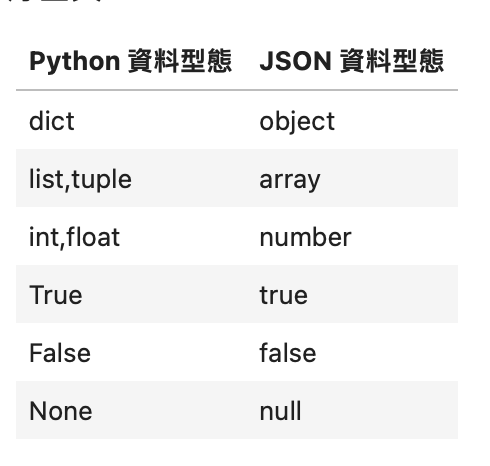


#### 簡單的python與json轉換的方法

- 注意必須使用json模組 import json

#### json.dump 將python資料寫入json

- json.dump(obj, fp, *, skipkeys=False, ensure_ascii=True, check_circular=True, allow_nan=True, cls=None, indent=None, separators=None, default=None, sort_keys=False, **kw)
    1. json.dump(python資料儲存的物件實體, 檔案物件)   
    2. 將Python中的dict資料型別轉存入json檔案中
    3. fp＝json可讀取的檔案物件（目前聽不懂）

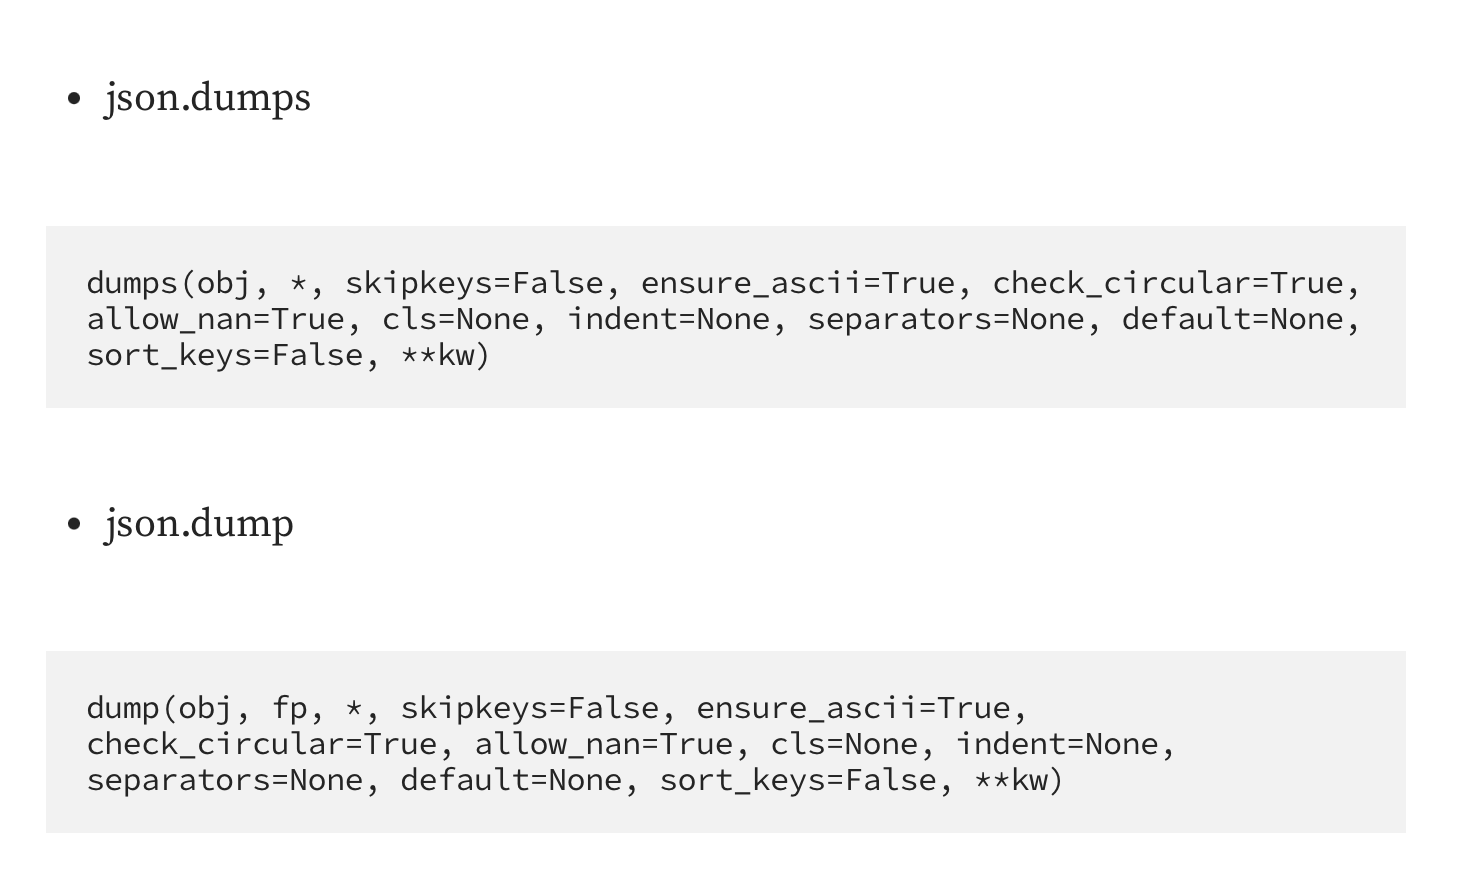

#### json.loads 讀取json資料

- json.loads(s, *, cls=None, object_hook=None, parse_float=None, parse_int=None, parse_constant=None, object_pairs_hook=None, **kw)¶

    1. json.load(檔案物件)                  
    2. 将 json 格式的字符串转换成 Python 对象（比如列表、字典、元组、整型以及浮点型）

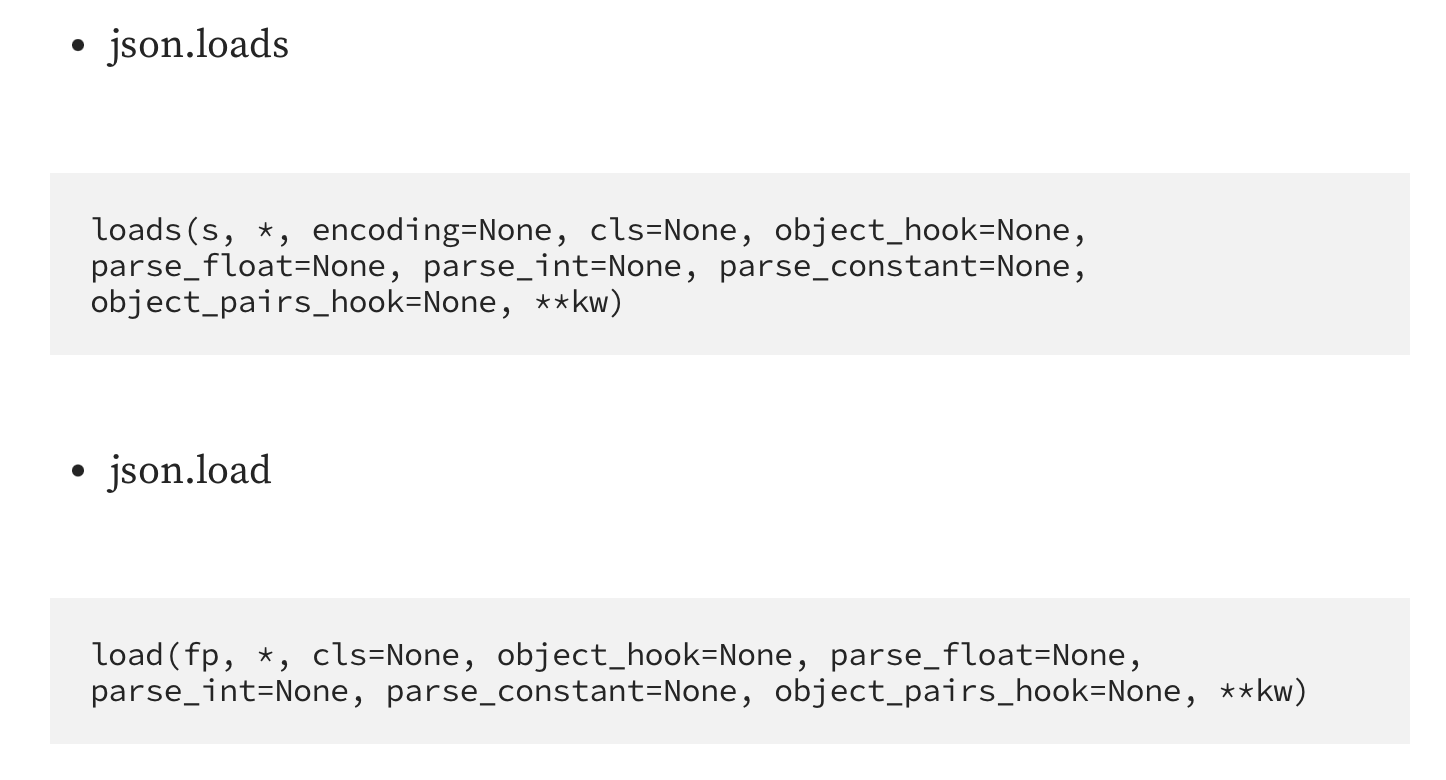

- Python 與 json 檔案:
    1. json檔案的中文資料於某些編輯軟體內會變成亂碼，但 Python 可以存取
    2. json資料於Python處理UTF8碼內容會產生亂碼，建議 dumps 時加入 以下的參數才可以正確處理UTF8碼內容:「ensure_ascii=False」

- 標准 JSON 必須使用雙引號 ( " ) 而不能使用單引號 ( ' )，否則在轉換成 dict 型別時會發生錯誤

[補充資料](http://c.biancheng.net/python_spider/json.html)

In [4]:
# 操作範例 1:請動手操作，並留意輸出結果
# 將dict轉成json格式的字串
# json3以utf-8編碼格式，資料型別變成byte

import json
pyDic = {'python': 'good', 'gjun': 100, 'python-class':True,'ICQ': None} #python的dict
json2 = json.dumps(pyDic, ensure_ascii=False) #轉為json的字串，ensure_ascii＝false 是避免亂碼用
print(type(json2)) 
json3=json2.encode('utf8')      #json.encode('編碼')
print(type(json3))
print(json2)
print(json3)

<class 'str'>
<class 'bytes'>
{"python": "good", "gjun": 100, "python-class": true, "ICQ": null}
b'{"python": "good", "gjun": 100, "python-class": true, "ICQ": null}'


In [30]:
# 操作範例 2:請動手操作，並留意輸出結果

import json
data = {}   #dict的物件
data['people'] = []   
data['people'].append({'name': 'Scott','website': 'stackabuse.com','from': 'Nebraska'})
data['people'].append({'name': 'Larry', 'website': 'google.com', 'from': 'Michigan'})

#使用dump寫入json檔案,必需使用python的dictionary物件
with open('data.json', 'w') as outfile: #開啟一個可以覆寫的data.json檔案
    json.dump(data, outfile)            #透過json.dump方法放入data這個dict跟fp＝outfile

#json.dump（物件,fp） ->將指定物件中的python資料轉為json可讀的格式
#json.dumps（物件）   ->將指定物件中的資料轉為json可讀的字串型別

#使用write寫入需使用的json字串格式
json2 = json.dumps(data)  
file=open('score.json','w',encoding='utf-8')
file.write((json2))
print(json2)
file.close()

{"people": [{"name": "Scott", "website": "stackabuse.com", "from": "Nebraska"}, {"name": "Larry", "website": "google.com", "from": "Michigan"}]}


#### 從 JSON 到 Python

- 以 json.loads(s) 函數從 JSON 字串中取出資料轉入 Python
- 以 json.load(fp) 函數從 JSON 檔案中取出資料轉入 Python

[補充](https://chwang12341.medium.com/寫給自己的技術筆記-作為程式開發者我們絕對不能忽略的json-python-如何處理json文件-b227b7e610a8)

[online Json Viewer](https://zh-tw.martech.zone/json-viewer-parse-tool/)
- 把原本很像亂碼的Json檔內容分類排列，增加可讀性

In [36]:
# 操作範例 1:請動手操作，並留意輸出結果
#使用loads將json格式的字串傳成python的Dict
#loads = 將已編碼的json內容轉為Python的內容

import json
json1 = '{"python": "good", "gjun": 100, "python-class": true, "ICQ": null}' #寫入一串json的資料
print('json1=',type(json1))
json2 = json.loads(json1) #轉回python可讀
print('json2=',type(json2), json2) 


json1= <class 'str'>
json2= <class 'dict'> {'python': 'good', 'gjun': 100, 'python-class': True, 'ICQ': None}


In [40]:
# 操作範例 2:請動手操作，並留意輸出結果
#使用load()將json檔轉成Dict

import json

#data = json.load('score.json')  #會出錯

with open('score.json') as json_file: 
    data = json.load(json_file)     #讀取score.json，並存入data
    for p in data['people']:        #用for in寫出data中的'people'這行的資料內容
        print('Name:' + p['name'])
        print('Website:' + p['website'])
        print('From:'+p['from'])
        print() #兩筆資料之間留一行空白

print(file.closed) #使用with的open會自動關閉檔案

Name:Scott
Website:stackabuse.com
From:Nebraska

Name:Larry
Website:google.com
From:Michigan

True


In [41]:
# 我自己怎麼可能做得出來？
# 請處理(新北市公共自行車租賃系統.json)
# google搜尋online json viewer

import json
with open('新北市公共自行車租賃系統.json') as json_file:
    data = json.load(json_file) #轉為python可讀
    if data['success']:        #找出有'success'這行的資料
        records = data['result']['records']    #將後面這兩筆資料儲存到records
    else:
        print('讀取失敗')

for record in records:
    if '新店區' in record['sarea']:        
        print('區域',record['sarea'])
        print('站名',record['sna'])
        print('地址',record['ar'])
        print('緯經度座標[{},{}]'.format(record['lat'],record['lng']))
        print('全部數量',record['tot'])
        print('可借',record['sbi'])
        print('可還',record['bemp'])
        print('----------------------')
        print()
           

區域 新店區
站名 大鵬華城
地址 新北市新店區中正路700巷3號
緯經度座標[24.99116,121.53398]
全部數量 38
可借 22
可還 13
----------------------

區域 新店區
站名 裕隆公園
地址 寶中路/品牌路口(東南側)
緯經度座標[24.979649,121.546319]
全部數量 40
可借 3
可還 37
----------------------

區域 新店區
站名 捷運大坪林站(5號出口)
地址 中興路三段224號(對面)
緯經度座標[24.982830,121.543620]
全部數量 94
可借 43
可還 51
----------------------

區域 新店區
站名 忠誠里(北新路2段97巷)
地址 北新路二段/北新路二段97巷
緯經度座標[24.974272,121.542779]
全部數量 40
可借 5
可還 35
----------------------

區域 新店區
站名 小金門友誼公園
地址 民族路/建興街
緯經度座標[24.977227,121.538140]
全部數量 60
可借 12
可還 48
----------------------

區域 新店區
站名 中興寶橋路口
地址 中興路三段1號旁
緯經度座標[24.976180 ,121.546870 ]
全部數量 52
可借 18
可還 33
----------------------

區域 新店區
站名 台北慈濟醫院
地址 建國路289號旁空地
緯經度座標[24.985872 ,121.536887 ]
全部數量 40
可借 9
可還 30
----------------------

區域 新店區
站名 崇光女中
地址 三民路14號至三民路18號
緯經度座標[24.972127 ,121.539554 ]
全部數量 36
可借 26
可還 10
----------------------

區域 新店區
站名 新店高中
地址 三民路159巷/三民路108號(對面人行道)
緯經度座標[24.974181 ,121.534209 ]
全部數量 42
可借 20
可還 22
----------------------

區域 新店區
站名 新店公有中央市場
地址 中央四街64號對面
緯經度座標[2

#### 檔案進階操作

##### 檔案存取與例外處理

- Python 的文件存取是透過 open( ) 方法建立文件物件方式進行存取， 如果文件不存在或讀取存限限制將會產生例外
- 檔案存取例外為 IOError ，另外有兩個子類別:
    1. FileNotFoundError，代表 “找不到檔案”
    2. PermissionError，代表 “沒有權限存取”

操作範例:請動手操作，並留意輸出結果(file_except1.py)

#### 關於檔案關閉動作
- 檔案開啟後須進行 close( ) 方法進行關閉動作。
- 若檔案沒關閉會造成:
    1. 開啟的文件物件會占用系統資源。
    2. Python 可以同時間開啟的文件數量有限制 (約 20 份文件)。
    3. 開啟文件物件的模式若為寫入 (w 或 a) 模式，一般都是暫存於緩衝區，系統閒置或文件關閉前才會進行寫入，若沒有進行 close( ) 動作可能造成文件儲存不完整。

In [42]:
# 操作範例:請動手操作，並留意輸出結果
import os

class tryopenfile: #自己創的class？
    def openfile(self, filePath):
        self.handle = open(filePath, 'w')
        self.handle.close()

if __name__ == '__main__':
    t = tryopenfile( )
    filePath = 'test.txt' 
    t.openfile(filePath)    
    os.remove(filePath)     #刪除檔案
    print('success')

success


#### With 方式操作檔案

多個檔案存取時若前一個檔案產生 IO 例外，將會造成後面無法進行close( ) 動作。
以 with 方式操作檔案:
檔案存取仍有可能產生 IO 例外。
離開 with 區塊時檔案將會自動進行close( )動作，自動關閉檔案。

In [11]:
# 操作範例 1:請動手操作，並留意輸出結果
try:
    with open('data1.txt', 'r', encoding="utf8") as f:
        print(f.read( ))
except FileNotFoundError:
    print("找不到檔案") 
except PermissionError:
    print("你沒有權限存取")
except IOError: 
    print("其他檔案IO問題")
except: 
    print("其他例外") 

找不到檔案


#### Numpy 簡介

可做到的功能

快速的多維陣列操作。
可靠的科學功能函數庫。
可協助繪圖工具進行繪圖。
NumPy 是幾乎每個科學 Python 應用程序或模組的核心，它提供了以向量化 形式的快速 N-d 陣列類型可供操作。

NumPy 的核心功能是陣列物件類別。

陣列類似 list，但陣列裡的元素必須是相同的類型。

list 不能直接使用算術運算工具 (+, -, *, /, ...) 。

Numpy 提供更有效率的計算與多維運算工具。

必須引用 numpy 才能運作。

[補充](https://steam.oxxostudio.tw/category/python/numpy/about-numpy.html)

In [12]:
#為何使用numpy, 而不使用list

import numpy as np
my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [13]:
%time for _ in range(10): my_arr2 = my_arr * 2

CPU times: user 5.23 ms, sys: 4.28 ms, total: 9.51 ms
Wall time: 8.25 ms


In [14]:
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

CPU times: user 202 ms, sys: 46.1 ms, total: 248 ms
Wall time: 247 ms


In [15]:
#操作範例: list 轉為一般陣列

a = [1,3,5,7,9]
print(a[2:4])

b = [[1, 3, 5, 7, 9], [2, 4, 6, 8, 10]] 
print(b[0])
print(b[1][2:4])

c = [1,3,5,7,9]
d = [3,5,6,7,9]
f=c+d
print(f)
print(type(a), type(b), type(c), type(d))

[5, 7]
[1, 3, 5, 7, 9]
[6, 8]
[1, 3, 5, 7, 9, 3, 5, 6, 7, 9]
<class 'list'> <class 'list'> <class 'list'> <class 'list'>


list 轉 ndarray 後的操作

例如 [1, 2, 3] 是一個維度為 1 的陣列，索引數量為 3。
例如 [[ 1, 0, 0.], [ 0, 1, 2]] 是一個維度為 2 的陣列，第一維索引數量為 2，第二維索引數量為 3。
NumPy 的陣列被稱作 ndarray 。
透過 array 方法將 list 轉換為 ndarray

In [16]:
import numpy as np
a = np.array([1,3,5,7,9]) 
b = np.array([3,5,6,7,9]) 
c=a+b
print(c) 
print("---------------") 
c=a-b
print(c) 
print("---------------") 
print(type(c))

[ 4  8 11 14 18]
---------------
[-2 -2 -1  0  0]
---------------
<class 'numpy.ndarray'>


Homework:檔案存取

請至政府資料開放平台下載
新北市食品工廠清冊
https://data.gov.tw/dataset/117928
可直接在目錄'檔案存取與numpy'中直接下載csv 和 json檔
請使用csv檔案讀出所有新北市食品工廠的廠商名稱

[os用法](https://steam.oxxostudio.tw/category/python/library/os.html)

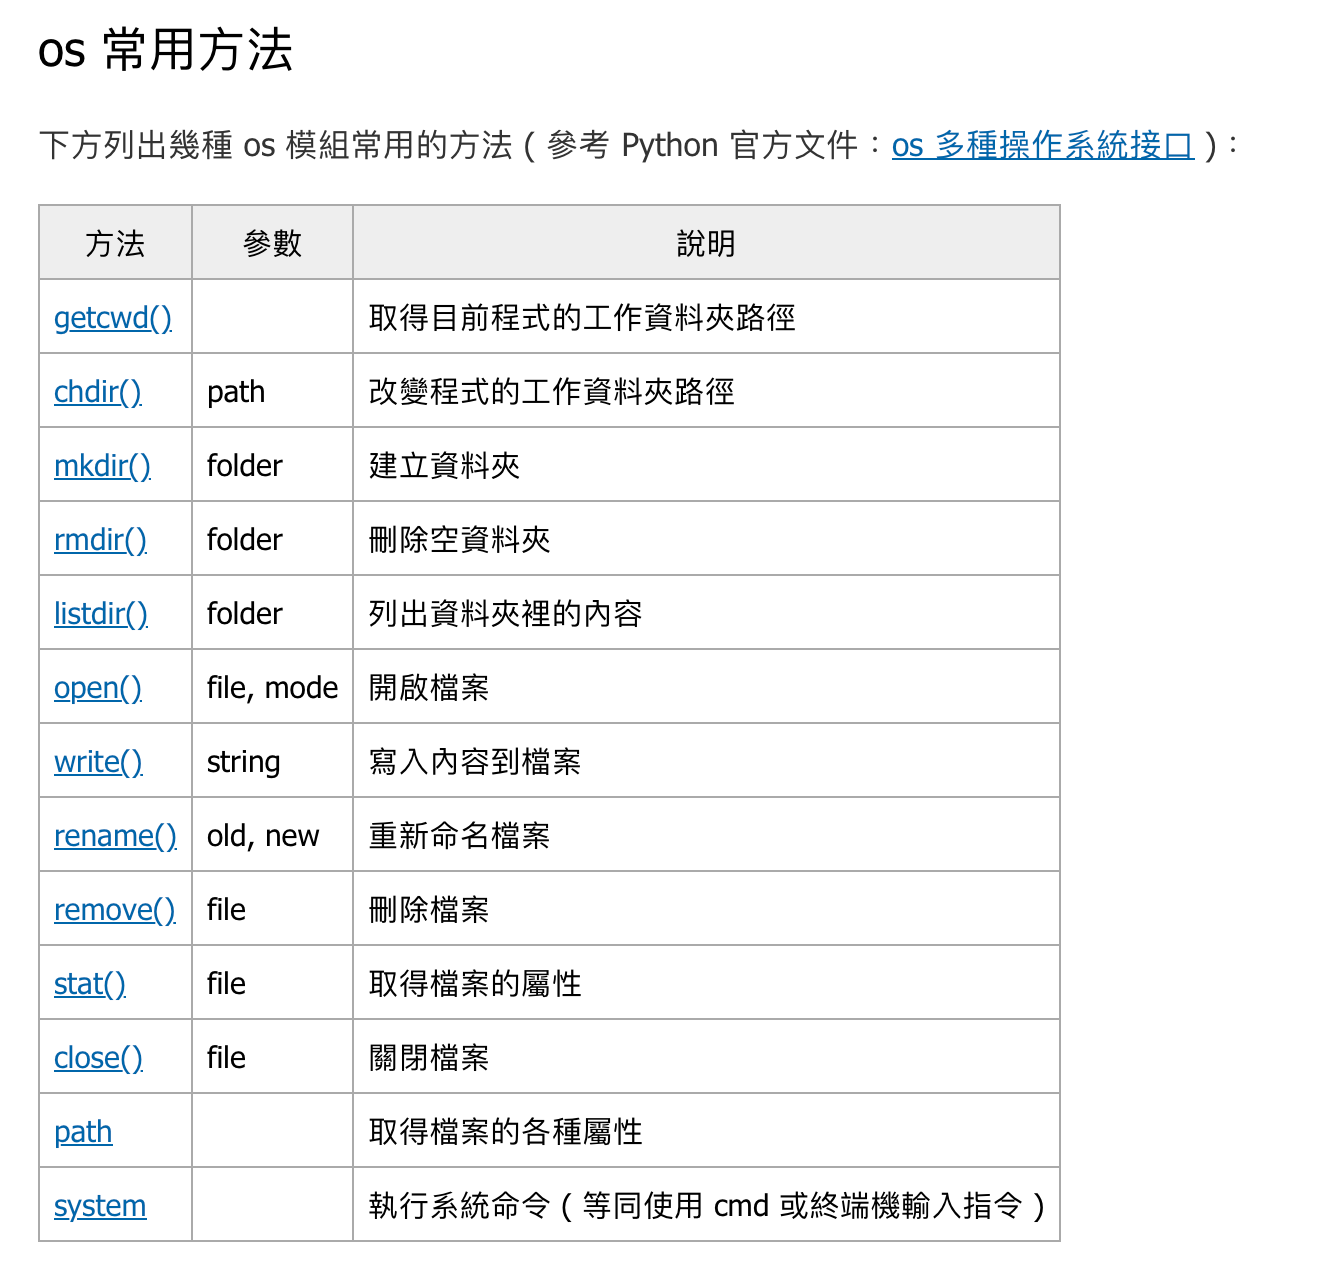

[講義](https://github.com/roberthsu2003/python/blob/master/檔案存取/README.ipynb)

[requests](https://steam.oxxostudio.tw/category/python/spider/requests.html)

